In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

644

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=420c13847d7ed98de959664badf7a2ae


In [12]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
   
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rio grande
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | lata
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | lagoa
Processing Record 7 of Set 1 | itea
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | fortuna
Processing Record 11 of Set 1 | conceicao do araguaia
Processing Record 12 of Set 1 | chala
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | belyy yar
Processing Record 15 of Set 1 | amot
Processing Record 16 of Set 1 | tadine
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | patancheru
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | altay
Processing Record 22 of Set 1 | acapulco
Processing Record 23 of Set 1 | norman wells
Pro

Processing Record 39 of Set 4 | broome
Processing Record 40 of Set 4 | samusu
City not found. Skipping...
Processing Record 41 of Set 4 | talcahuano
Processing Record 42 of Set 4 | boyolangu
Processing Record 43 of Set 4 | bargal
City not found. Skipping...
Processing Record 44 of Set 4 | shakawe
Processing Record 45 of Set 4 | mato verde
Processing Record 46 of Set 4 | marv dasht
City not found. Skipping...
Processing Record 47 of Set 4 | muros
Processing Record 48 of Set 4 | vestmannaeyjar
Processing Record 49 of Set 4 | cayenne
Processing Record 50 of Set 4 | yulara
Processing Record 1 of Set 5 | lorengau
Processing Record 2 of Set 5 | nuuk
Processing Record 3 of Set 5 | prince rupert
Processing Record 4 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 5 of Set 5 | hurghada
Processing Record 6 of Set 5 | tazovskiy
Processing Record 7 of Set 5 | ilulissat
Processing Record 8 of Set 5 | cedar city
Processing Record 9 of Set 5 | bilma
Processing Record 10 of Set 5 

Processing Record 28 of Set 8 | sechura
Processing Record 29 of Set 8 | san pedro
Processing Record 30 of Set 8 | mulchen
Processing Record 31 of Set 8 | fevralsk
City not found. Skipping...
Processing Record 32 of Set 8 | hearst
Processing Record 33 of Set 8 | porterville
Processing Record 34 of Set 8 | whitianga
Processing Record 35 of Set 8 | satitoa
City not found. Skipping...
Processing Record 36 of Set 8 | batagay-alyta
Processing Record 37 of Set 8 | chimore
Processing Record 38 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 39 of Set 8 | webster
Processing Record 40 of Set 8 | mabaruma
Processing Record 41 of Set 8 | bahia blanca
Processing Record 42 of Set 8 | cabo san lucas
Processing Record 43 of Set 8 | maridi
Processing Record 44 of Set 8 | wakkanai
Processing Record 45 of Set 8 | baswa
Processing Record 46 of Set 8 | sira
Processing Record 47 of Set 8 | necochea
Processing Record 48 of Set 8 | rorvik
Processing Record 49 of Set 8 | longkou

Processing Record 13 of Set 12 | korla
Processing Record 14 of Set 12 | whyalla
Processing Record 15 of Set 12 | halifax
Processing Record 16 of Set 12 | tonantins
Processing Record 17 of Set 12 | the valley
Processing Record 18 of Set 12 | bubaque
Processing Record 19 of Set 12 | yuncheng
Processing Record 20 of Set 12 | one hundred mile house
City not found. Skipping...
Processing Record 21 of Set 12 | hualmay
Processing Record 22 of Set 12 | baykit
Processing Record 23 of Set 12 | anchorage
Processing Record 24 of Set 12 | kidodi
Processing Record 25 of Set 12 | tura
Processing Record 26 of Set 12 | impfondo
Processing Record 27 of Set 12 | shimoda
Processing Record 28 of Set 12 | tete
Processing Record 29 of Set 12 | yirol
City not found. Skipping...
Processing Record 30 of Set 12 | paranga
Processing Record 31 of Set 12 | pekan
Processing Record 32 of Set 12 | wanlaweyn
Processing Record 33 of Set 12 | vanimo
Processing Record 34 of Set 12 | chake chake
Processing Record 35 of Set

In [15]:
count = len(city_data)
print(count)

585


In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rio Grande,-32.0350,-52.0986,73.94,60,14,11.79,BR,2022-01-28 22:08:56
1,Vaini,-21.2000,-175.2000,82.38,79,98,19.19,TO,2022-01-28 22:08:57
2,Lata,40.1629,-8.3327,50.05,61,0,4.54,PT,2022-01-28 22:08:57
3,Rikitea,-23.1203,-134.9692,78.06,70,100,15.64,PF,2022-01-28 22:08:58
4,Georgetown,5.4112,100.3354,81.90,87,20,0.00,MY,2022-01-28 22:06:55
5,Lagoa,39.0500,-27.9833,57.78,57,87,12.59,PT,2022-01-28 22:08:59
6,Itea,38.4333,22.4167,50.00,69,94,4.23,GR,2022-01-28 22:08:59
7,Hithadhoo,-0.6000,73.0833,80.31,63,50,5.99,MV,2022-01-28 22:09:00
8,Port Alfred,-33.5906,26.8910,66.87,78,14,9.51,ZA,2022-01-28 22:09:00
9,Fortuna,40.5982,-124.1573,65.86,36,20,0.00,US,2022-01-28 22:09:01


In [17]:
reorg_city_data = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
reorg_city_data_df = city_data_df[reorg_city_data]
reorg_city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rio Grande,BR,2022-01-28 22:08:56,-32.0350,-52.0986,73.94,60,14,11.79
1,Vaini,TO,2022-01-28 22:08:57,-21.2000,-175.2000,82.38,79,98,19.19
2,Lata,PT,2022-01-28 22:08:57,40.1629,-8.3327,50.05,61,0,4.54
3,Rikitea,PF,2022-01-28 22:08:58,-23.1203,-134.9692,78.06,70,100,15.64
4,Georgetown,MY,2022-01-28 22:06:55,5.4112,100.3354,81.90,87,20,0.00
...,...,...,...,...,...,...,...,...,...
580,Codajas,BR,2022-01-28 22:26:20,-3.8367,-62.0569,78.62,86,100,1.68
581,Belaya Gora,RU,2022-01-28 22:26:20,68.5333,146.4167,-28.35,96,100,3.15
582,Ouadda,CF,2022-01-28 22:26:21,8.0777,22.4007,70.00,21,73,7.40
583,Poplar Bluff,US,2022-01-28 22:26:21,36.7570,-90.3929,37.13,32,0,16.11


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

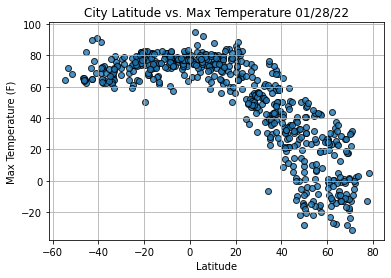

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

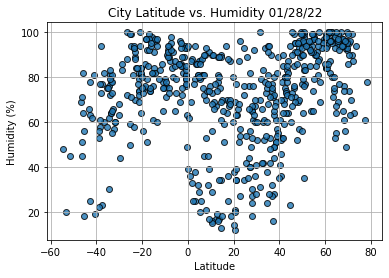

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

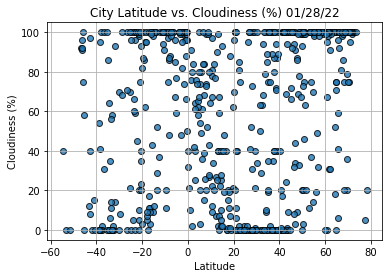

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

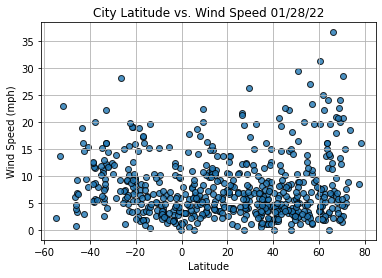

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()